# DengAI: Predicting Disease Spread

In [58]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [59]:
features_raw_df = pd.read_csv("data/dengue_features_train.csv")
labels_raw_df = pd.read_csv("data/dengue_labels_train.csv")

In [60]:
print("features_raw_df.shape", features_raw_df.shape)
features_raw_df.head()

features_raw_df.shape (1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [61]:
features_raw_df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [62]:
print("labels_raw_df.shape", labels_raw_df.shape)
labels_raw_df.head()

labels_raw_df.shape (1456, 4)


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [63]:
labels_raw_df.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [64]:
features_df = features_raw_df.copy()
labels_df = labels_raw_df.copy()

### Exploratory Data Analysis

In [65]:
features_df['week_start_date'] = pd.to_datetime(features_df.week_start_date, format='%Y-%m-%d')

In [66]:
features_df.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [67]:
# Null check
pd.isnull(features_df).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [68]:
is_iq = features_df['city']=='iq'
is_sj = features_df['city']=='sj'

In [69]:
features_df_iq = features_df[is_iq]
features_df_sj = features_df[is_sj]

In [70]:
feats = list(features_df.loc[:,'ndvi_ne':'station_precip_mm'].columns)
feats

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [71]:
def plot_features(features):
    fig, axs = plt.subplots(len(features))
    for i, feature in enumerate(features):
        axs[i].plot(features_df_iq.week_start_date, features_df_iq[feature], label='Iquito')
        axs[i].plot(features_df_sj.week_start_date, features_df_sj[feature], label='San Juan')
        axs[i].legend()
        axs[i].set_title(feature)
    fig.set_figheight(3*len(features))
    fig.set_figwidth(15)
    plt.show()

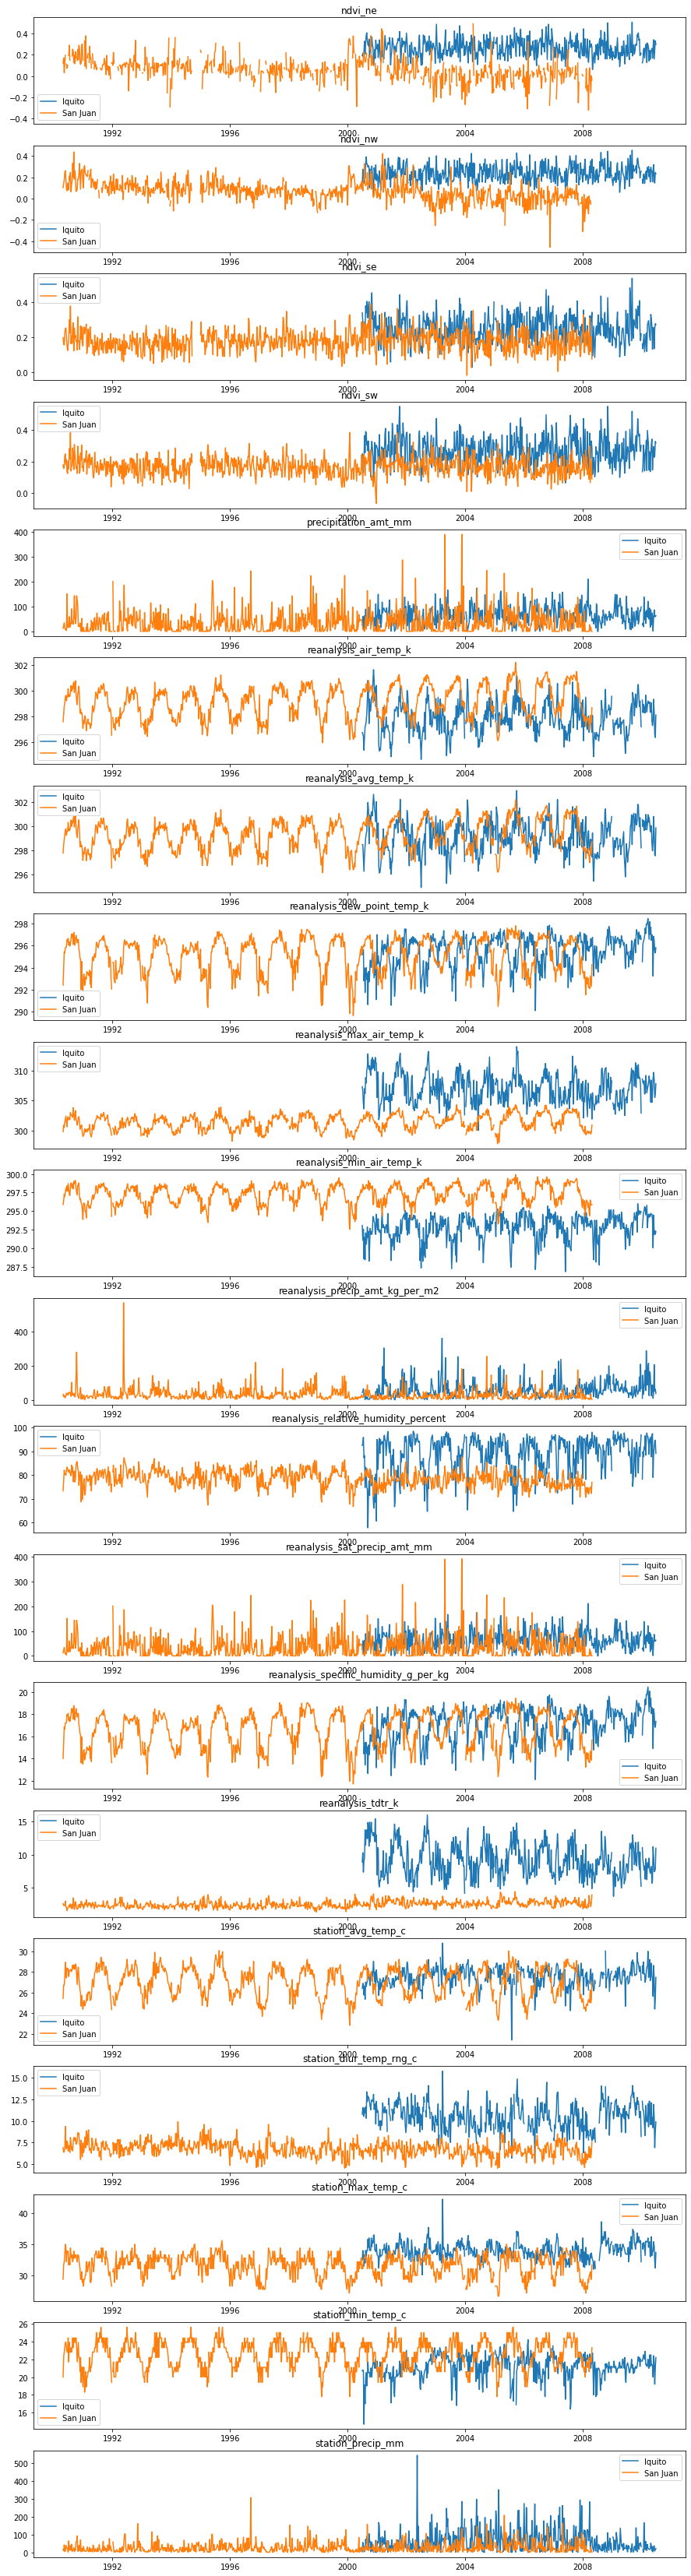

In [72]:
plot_features(feats)

Since there are some missing data, this will be filled with the previous value.

In [73]:
features_df_iq.fillna(method='ffill', inplace=True)
features_df_sj.fillna(method='ffill', inplace=True)

/home/daansan/David/DengAI/venv/lib/python3.6/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [74]:
is_iq_labels = labels_df['city']=='iq'
is_sj_labels = labels_df['city']=='sj'

In [75]:
labels_df_iq = labels_df[is_iq_labels]
labels_df_sj = labels_df[is_sj_labels]

In [76]:
print('San Juan')
print('mean: ', labels_df_sj.total_cases.mean())
print('var :', labels_df_sj.total_cases.var())

print('\nIquitos')
print('mean: ', labels_df_iq.total_cases.mean())
print('var :', labels_df_iq.total_cases.var())

San Juan
mean:  34.18055555555556
var : 2640.0454396910277

Iquitos
mean:  7.565384615384615
var : 115.89552393656439


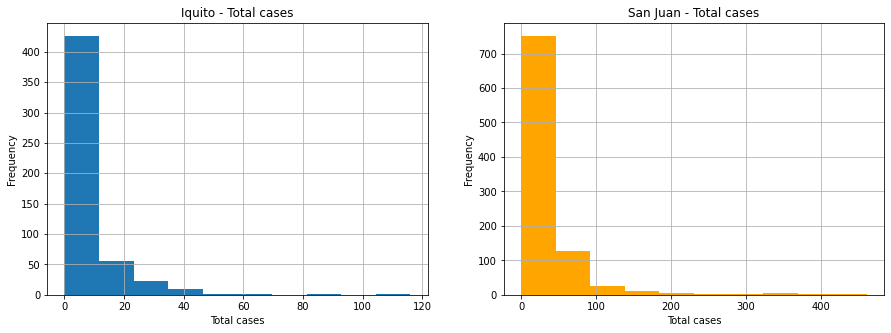

In [77]:
fig, axs = plt.subplots(1,2)
labels_df_iq.total_cases.hist(ax=axs[0])
axs[0].set_title('Iquito - Total cases')
labels_df_sj.total_cases.hist(ax=axs[1], color='orange')
axs[0].set_xlabel('Total cases')
axs[0].set_ylabel('Frequency')
axs[1].set_title('San Juan - Total cases')
axs[1].set_xlabel('Total cases')
axs[1].set_ylabel('Frequency')
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

In [78]:
df_iq = pd.concat([features_df_iq, labels_df_iq.total_cases], axis=1)
df_sj = pd.concat([features_df_sj, labels_df_sj.total_cases], axis=1)

In [79]:
feats.append('total_cases')

In [80]:
df_iq_feats = df_iq.loc[:,feats]
df_sj_feats = df_sj.loc[:,feats]

In [81]:
# compute the correlations
sj_correlations = df_iq_feats.corr()
iq_correlations = df_sj_feats.corr()

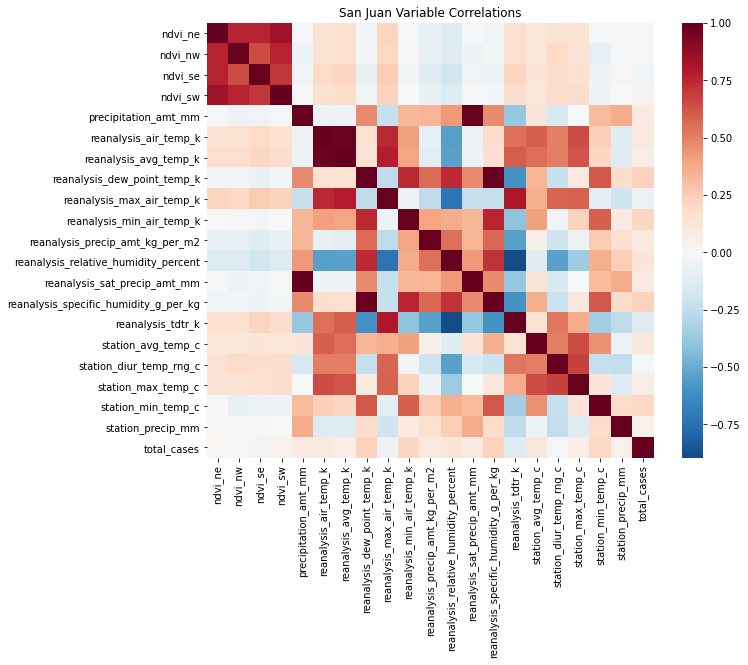

In [82]:
plt.figure(figsize = (10,8))
sj_corr_heat = sns.heatmap(sj_correlations, center=0, cmap='RdBu_r')
plt.title('San Juan Variable Correlations')
plt.show()

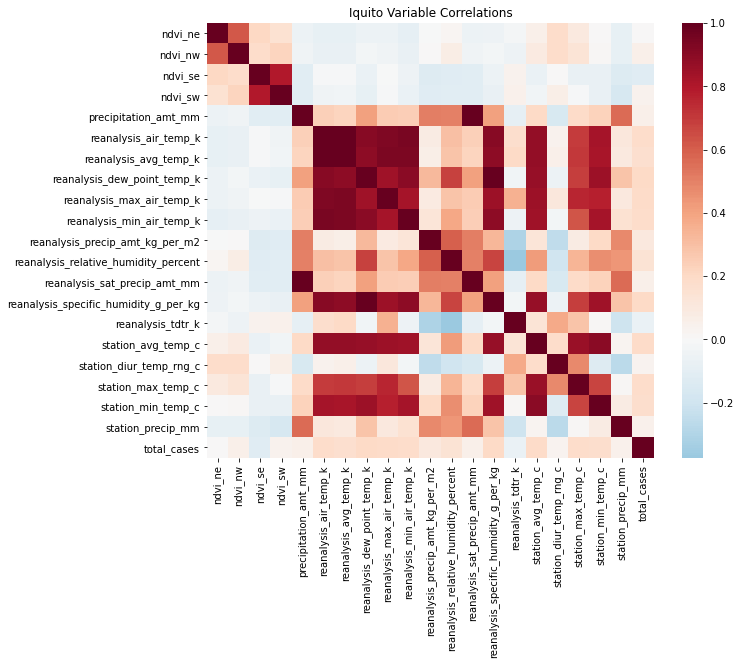

In [83]:
plt.figure(figsize = (10,8))
iq_corr_heat = sns.heatmap(iq_correlations, center=0, cmap='RdBu_r')
plt.title('Iquito Variable Correlations')
plt.show()

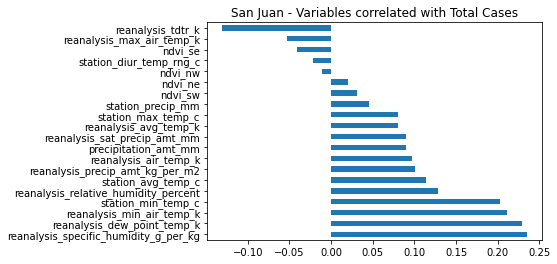

In [84]:
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with itself
     .sort_values(ascending=False)
     .plot
     .barh())
plt.title('San Juan - Variables correlated with Total Cases')
plt.show()

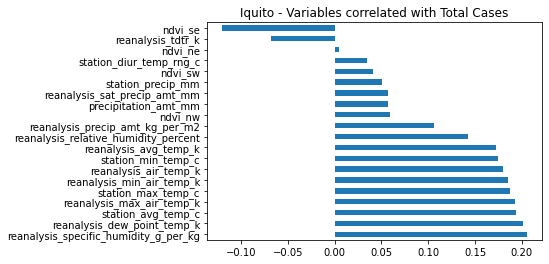

In [85]:
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with itself
     .sort_values(ascending=False)
     .plot
     .barh())
plt.title('Iquito - Variables correlated with Total Cases')
plt.show()

In [86]:
def preprocess_data(df_features, df_labels=None, features=[], n_feats=4):
    df_features.set_index(['city', 'year', 'weekofyear'], inplace=True)
    df_features.drop(['week_start_date'], axis=1)    
    df_features.fillna(method='ffill', inplace=True)
    
    if isinstance(df_labels, pd.DataFrame):
        df_labels.set_index(['city', 'year', 'weekofyear'], inplace=True)
        df = pd.concat([df_features, df_labels.total_cases], axis=1)
    else:
        df = df_features
    
    df_iq = df.loc['iq']
    df_sj = df.loc['sj']
    
    if isinstance(df_labels, pd.DataFrame) and len(features) == 0:
        
        sj_correlations = df_iq.corr()
        iq_correlations = df_sj.corr()
        
        most_correlated_feats_iq = iq_correlations.total_cases.drop('total_cases').abs().sort_values(ascending=False).index[:n_feats]
        most_correlated_feats_sj = sj_correlations.total_cases.drop('total_cases').abs().sort_values(ascending=False).index[:n_feats]
        features = list(set(list(most_correlated_feats_iq) + list(most_correlated_feats_sj))) 

        df_iq = df_iq.loc[:,features + ['total_cases']]
        df_sj = df_sj.loc[:,features + ['total_cases']]
        
    elif isinstance(df_labels, pd.DataFrame) and len(features) > 0:
        
        df_iq = df_iq.loc[:,features + ['total_cases']]
        df_sj = df_sj.loc[:,features + ['total_cases']]
        
    elif len(features) > 0:
        df_iq = df_iq.loc[:,features]
        df_sj = df_sj.loc[:,features]
    else:
        print('Input the labels or the features to consider for the model.')
            
    return df_iq, df_sj, features

In [87]:
df_features = features_raw_df.copy()
df_labels = labels_raw_df.copy()
df_iq, df_sj, features = preprocess_data(df_features=df_features, df_labels=df_labels, n_feats=10)

In [88]:
features

['reanalysis_specific_humidity_g_per_kg',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'station_min_temp_c',
 'reanalysis_relative_humidity_percent',
 'reanalysis_min_air_temp_k',
 'reanalysis_max_air_temp_k',
 'station_avg_temp_c',
 'reanalysis_dew_point_temp_k',
 'reanalysis_tdtr_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_avg_temp_k',
 'station_max_temp_c']

In [89]:
df_iq.describe()

,reanalysis_specific_humidity_g_per_kg,precipitation_amt_mm,reanalysis_air_temp_k,station_min_temp_c,reanalysis_relative_humidity_percent,reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,station_avg_temp_c,reanalysis_dew_point_temp_k,reanalysis_tdtr_k,reanalysis_precip_amt_kg_per_m2,reanalysis_avg_temp_k,station_max_temp_c,total_cases
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,17.102019,64.353750,297.869464,21.210385,88.666786,292.879038,307.066923,27.506331,295.498723,9.189835,57.590500,299.131374,33.966731,7.565385
std,1.443048,35.180867,1.171486,1.257734,7.580526,1.662983,2.389779,0.908973,1.414360,2.455961,50.125737,1.332866,1.355439,10.765478
min,12.111429,0.000000,294.635714,14.700000,57.787143,286.900000,300.000000,21.400000,290.088571,3.714286,0.000000,294.892857,30.100000,0.000000
25%,16.121429,39.147500,297.092500,20.600000,84.295000,292.000000,305.200000,26.957500,294.596429,7.371429,24.212500,298.217857,33.175000,1.000000
50%,17.428571,60.470000,297.822857,21.400000,90.942857,293.100000,307.000000,27.587500,295.852143,8.957143,46.440000,299.121429,34.000000,5.000000
75%,18.180357,86.005000,298.649286,22.000000,94.589643,294.200000,308.700000,28.075000,296.557143,11.003571,71.072500,300.123214,34.900000,9.000000
max,20.461429,210.830000,301.637143,24.200000,98.610000,296.000000,314.000000,30.800000,298.450000,16.028571,362.030000,302.928571,42.200000,116.000000


In [90]:
df_sj.describe()

,reanalysis_specific_humidity_g_per_kg,precipitation_amt_mm,reanalysis_air_temp_k,station_min_temp_c,reanalysis_relative_humidity_percent,reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,station_avg_temp_c,reanalysis_dew_point_temp_k,reanalysis_tdtr_k,reanalysis_precip_amt_kg_per_m2,reanalysis_avg_temp_k,station_max_temp_c,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,16.547535,35.316485,299.158243,22.594017,78.570324,297.297863,301.393162,26.999191,295.104736,2.514667,30.401154,299.271543,31.597009,34.180556
std,1.560663,44.655240,1.237297,1.506281,3.384775,1.295172,1.259469,1.415079,1.570075,0.498182,35.532376,1.219798,1.719094,51.381372
min,11.715714,0.000000,295.938571,17.800000,66.735714,292.600000,297.800000,22.842857,289.642857,1.357143,0.000000,296.114286,26.700000,0.000000
25%,15.233571,0.000000,298.193571,21.700000,76.246786,296.300000,300.400000,25.842857,293.843929,2.157143,10.875000,298.298214,30.600000,9.000000
50%,16.835000,20.450000,299.246429,22.800000,78.667857,297.500000,301.500000,27.214286,295.451429,2.457143,21.280000,299.378571,31.700000,19.000000
75%,17.854286,51.927500,300.130714,23.900000,80.952500,298.400000,302.400000,28.175000,296.415714,2.789286,37.000000,300.223214,32.800000,37.000000
max,19.440000,390.600000,302.200000,25.600000,87.575714,299.900000,304.300000,30.071429,297.795714,4.428571,570.500000,302.164286,35.600000,461.000000


train_size = 0.8
n_rows_sj = int(len(df_sj)*train_size)
n_rows_iq = int(len(df_iq)*train_size)

sj_train = df_sj.head(n_rows_sj)
sj_test = df_sj.tail(df_sj.shape[0] - n_rows_sj)

iq_train = df_iq.head(n_rows_iq)
iq_test = df_iq.tail(df_iq.shape[0] - n_rows_iq)

In [92]:
dataset = df_sj
values = dataset.values

In [165]:
dataset

reanalysis_specific_humidity_g_per_kg  precipitation_amt_mm  \
year weekofyear                                                                
1990 18                                      14.012857                 12.42   
     19                                      15.372857                 22.82   
     20                                      16.848571                 34.54   
     21                                      16.672857                 15.36   
     22                                      17.210000                  7.52   
...                                                ...                   ...   
2008 13                                      13.644286                 27.19   
     14                                      14.662857                  3.82   
     15                                      14.184286                 16.96   
     16                                      13.858571                  0.00   
     17                                      15.671429                  0.00   

                 reanalysis_air_temp_k  station_min_temp_c  \
year weekofyear                                              
1990 18                     297.572857                20.0   
     19                     298.211429                22.2   
     20                     298.781429                22.8   
     21                     298.987143                23.3   
     22                     299.518571                23.9   
...                                ...                 ...   
2008 13                     296.958571                21.1   
     14                     298.081429                22.2   
     15                     297.460000                21.7   
     16                     297.630000                21.7   
     17                     298.672857                23.3   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   
...                                               ...   
2008 13                                     74.247143   
     14                                     74.600000   
     15                                     75.027143   
     16                                     72.285714   
     17                                     76.960000   

                 reanalysis_min_air_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                         
1990 18                              295.9                      299.8   
     19                              296.4                      300.9   
     20                              297.3                      300.5   
     21                              297.0                      301.4   
     22                              297.5                      301.9   
...                                    ...                        ...   
2008 13                              294.4                      299.7   
     14                              296.5                      299.8   
     15                              295.8                      299.4   
     16                              295.9                      299.7   
     17                              295.9                      300.9   

                 station_avg_temp_c  reanalysis_dew_point_temp_k  \
year weekofyear                                                    
1990 18                   25.442857                   292.414286   
     19                   26.714286                   293.951429   
     20                   26.714286                   295.434286   
     21                   27.471429                   295.310000   
     22                   28.942857                   295.821429   
.

In [97]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [176]:
# prepare data for lstm
from sklearn.preprocessing import MinMaxScaler

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)



In [177]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t)
1,0.297392,0.031797,0.261009,0.282051,0.318138,0.452057,0.307693,0.359684,0.339931,0.413954,...,0.510214,0.520550,0.476925,0.535573,0.528473,0.330233,0.031446,0.384892,0.561798,0.006508
2,0.473460,0.058423,0.362995,0.564103,0.510214,0.520550,0.476925,0.535573,0.528473,0.330233,...,0.734988,0.643837,0.415386,0.535573,0.710358,0.306977,0.045749,0.456909,0.617977,0.013015
3,0.664509,0.088428,0.454029,0.641026,0.734988,0.643837,0.415386,0.535573,0.710358,0.306977,...,0.652660,0.602741,0.553848,0.640316,0.695110,0.348837,0.024365,0.514759,0.741573,0.004338
4,0.641761,0.039324,0.486881,0.705128,0.652660,0.602741,0.553848,0.640316,0.695110,0.348837,...,0.658555,0.671234,0.630772,0.843874,0.757843,0.539535,0.021385,0.586777,0.932584,0.008677
5,0.711300,0.019252,0.571758,0.782051,0.658555,0.671234,0.630772,0.843874,0.757843,0.539535,...,0.631272,0.753426,0.707695,0.729249,0.761520,0.241860,0.046433,0.603306,0.865169,0.010846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.357130,0.000000,0.309834,0.423077,0.381272,0.397263,0.323078,0.314229,0.418259,0.409302,...,0.249451,0.479454,0.261539,0.343874,0.313301,0.237209,0.016442,0.252655,0.247191,0.008677
930,0.259663,0.000000,0.264656,0.564103,0.249451,0.479454,0.261539,0.343874,0.313301,0.237209,...,0.296545,0.315067,0.307693,0.326087,0.314350,0.818605,0.001578,0.218414,0.370787,0.006508
931,0.261698,0.000000,0.234089,0.358974,0.296545,0.315067,0.307693,0.326087,0.314350,0.818605,...,0.360433,0.246574,0.292313,0.304348,0.300858,0.497674,0.013234,0.139317,0.370787,0.002169
932,0.249676,0.069611,0.162899,0.423077,0.360433,0.246574,0.292313,0.304348,0.300858,0.497674,...,0.377365,0.534248,0.307693,0.470356,0.440685,0.441860,0.006433,0.349472,0.438202,0.006508


In [178]:
# drop columns we don't want to predict
reframed.drop(list(reframed.columns[14:-1]), axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.297392   0.031797   0.261009   0.282051   0.318138   0.452057   
2   0.473460   0.058423   0.362995   0.564103   0.510214   0.520550   
3   0.664509   0.088428   0.454029   0.641026   0.734988   0.643837   
4   0.641761   0.039324   0.486881   0.705128   0.652660   0.602741   
5   0.711300   0.019252   0.571758   0.782051   0.658555   0.671234   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.307693   0.359684   0.339931    0.413954    0.056091    0.269188   
2   0.476925   0.535573   0.528473    0.330233    0.031446    0.384892   
3   0.415386   0.535573   0.710358    0.306977    0.045749    0.456909   
4   0.553848   0.640316   0.695110    0.348837    0.024365    0.514759   
5   0.630772   0.843874   0.757843    0.539535    0.021385    0.586777   

   var13(t-1)  var14(t-1)  var14(t)  
1    0.303371    0.008677  0.006508  
2    0.561798    0.006508  0.013015  
3    0.617977 

In [179]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var14(t)
1,0.297392,0.031797,0.261009,0.282051,0.318138,0.452057,0.307693,0.359684,0.339931,0.413954,0.056091,0.269188,0.303371,0.008677,0.006508
2,0.473460,0.058423,0.362995,0.564103,0.510214,0.520550,0.476925,0.535573,0.528473,0.330233,0.031446,0.384892,0.561798,0.006508,0.013015
3,0.664509,0.088428,0.454029,0.641026,0.734988,0.643837,0.415386,0.535573,0.710358,0.306977,0.045749,0.456909,0.617977,0.013015,0.004338
4,0.641761,0.039324,0.486881,0.705128,0.652660,0.602741,0.553848,0.640316,0.695110,0.348837,0.024365,0.514759,0.741573,0.004338,0.008677
5,0.711300,0.019252,0.571758,0.782051,0.658555,0.671234,0.630772,0.843874,0.757843,0.539535,0.021385,0.586777,0.932584,0.008677,0.010846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.357130,0.000000,0.309834,0.423077,0.381272,0.397263,0.323078,0.314229,0.418259,0.409302,0.011394,0.312870,0.303371,0.006508,0.008677
930,0.259663,0.000000,0.264656,0.564103,0.249451,0.479454,0.261539,0.343874,0.313301,0.237209,0.016442,0.252655,0.247191,0.008677,0.006508
931,0.261698,0.000000,0.234089,0.358974,0.296545,0.315067,0.307693,0.326087,0.314350,0.818605,0.001578,0.218414,0.370787,0.006508,0.002169
932,0.249676,0.069611,0.162899,0.423077,0.360433,0.246574,0.292313,0.304348,0.300858,0.497674,0.013234,0.139317,0.370787,0.002169,0.006508


In [180]:
reframed.shape[0]

933

In [181]:
# split into train and test sets
values = reframed.values
n_train_days = int(reframed.shape[0]*0.8)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(746, 1, 14) (746,) (187, 1, 14) (187,)


Epoch 1/50
10/10 - 2s - loss: 0.0897 - val_loss: 0.0594
Epoch 2/50
10/10 - 0s - loss: 0.0594 - val_loss: 0.0401
Epoch 3/50
10/10 - 0s - loss: 0.0556 - val_loss: 0.0355
Epoch 4/50
10/10 - 0s - loss: 0.0563 - val_loss: 0.0411
Epoch 5/50
10/10 - 0s - loss: 0.0526 - val_loss: 0.0363
Epoch 6/50
10/10 - 0s - loss: 0.0525 - val_loss: 0.0360
Epoch 7/50
10/10 - 0s - loss: 0.0515 - val_loss: 0.0363
Epoch 8/50
10/10 - 0s - loss: 0.0498 - val_loss: 0.0344
Epoch 9/50
10/10 - 0s - loss: 0.0492 - val_loss: 0.0344
Epoch 10/50
10/10 - 0s - loss: 0.0478 - val_loss: 0.0334
Epoch 11/50
10/10 - 0s - loss: 0.0467 - val_loss: 0.0328
Epoch 12/50
10/10 - 0s - loss: 0.0453 - val_loss: 0.0318
Epoch 13/50
10/10 - 0s - loss: 0.0440 - val_loss: 0.0310
Epoch 14/50
10/10 - 0s - loss: 0.0425 - val_loss: 0.0299
Epoch 15/50
10/10 - 0s - loss: 0.0411 - val_loss: 0.0289
Epoch 16/50
10/10 - 0s - loss: 0.0395 - val_loss: 0.0276
Epoch 17/50
10/10 - 0s - loss: 0.0379 - val_loss: 0.0265
Epoch 18/50
10/10 - 0s - loss: 0.0362 - 

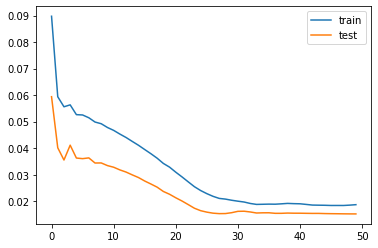

In [182]:
import tensorflow as tf
# design network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=75, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [185]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# make a prediction
yhat = model.predict(test_X)
test_X_resh = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X_resh[:, 0:-1]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X_resh[:, 0:-1]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.024


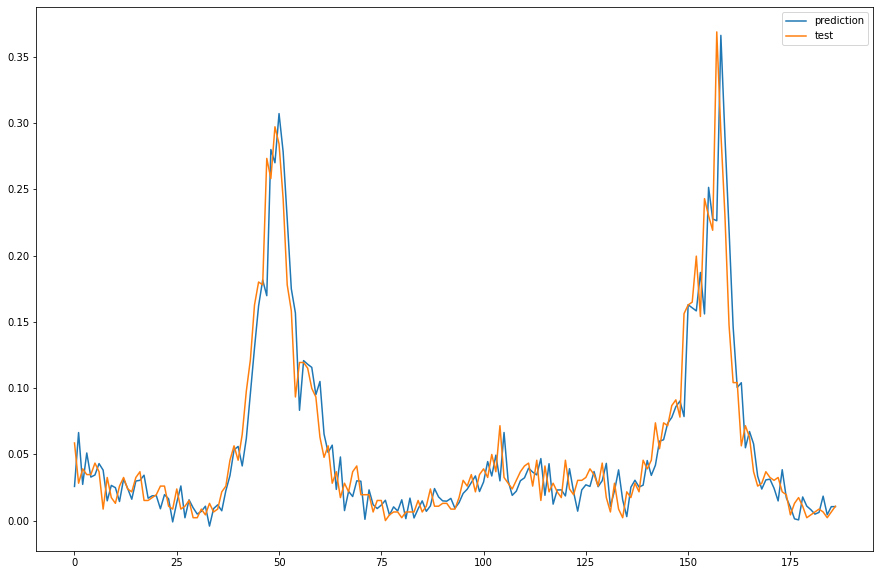

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(yhat[:500],label='prediction')
plt.plot(test_y[:500],label='test')
plt.legend()
plt.show()